# Text Classification of StackOverflow using TF-IDF Vectors

In [1]:
import sys
import os
from os import pardir, getcwd
from os.path import join, abspath
PARENT_DIRECTORY = abspath(join(getcwd(), pardir))
sys.path.insert(0, PARENT_DIRECTORY)

import warnings
import sklearn.exceptions
import talos as ta
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


from definitions import TALOS_DIR
from app.preprocessing import load_dataset,preprocess_data
from app.models import load_model


Using TensorFlow backend.


## Preprocessing for the loaded Dataset
1. Format into *lowercase*
2. Remove some of the *punctuation* characters
3. Remove *Numbers*
4. Remove *stopwords*
5. Remove *links*
6. Apply Stemmings

In [3]:
data = load_dataset(load_from_pickle=True, input_ins='as_tf_idf')
Classes = list(data['tags'].value_counts().index)
Nclasses = len(Classes)
print(data['tags'].value_counts())

sql              2000
ruby-on-rails    2000
android          2000
angularjs        2000
asp.net          2000
c                2000
c#               2000
c++              2000
css              2000
html             2000
ios              2000
iphone           2000
java             2000
javascript       2000
jquery           2000
mysql            2000
objective-c      2000
php              2000
python           2000
.net             2000
Name: tags, dtype: int64


## MLP classifier in Keras using not standardized tf*idf features

 ### Hyper parameter tuning for the **tf-idf** model

In [4]:
# 70% Train & 10% HeldOut & 20% Test
model_data_tf = preprocess_data(data, 'tags', 'post',
                                input_ins='as_tf_idf',
                                cv_split_full=0.2,
                                cv_split_dev=0.125)


In [6]:
'''Use the test filename if ypu don't want to delete
    # your current logs from the previous run.'''
TALOS_TF_LOG_FILENAME = 'talos_tf_log'
talos_tf_log_pathname = os.path.join(TALOS_DIR, TALOS_TF_LOG_FILENAME)

###### Production configuration
tf_idf_model_config = {
    'visualize_proccess': [False],
    'first_neuron': [64, 128],  # First Layer
    'activation': ['relu', 'tanh'],
    'dropout': [0.2, 0.6],
    'number_of_hidden_layers': [0, 1, 2],
    'shapes':['funnel'],
    'epochs': [4, 5, 7],
    'early_stopping':[True],
    'early_stopping_config__monitor': ['val_f1'],
    'early_stopping_config__min_delta': [0],
    'early_stopping_config__patience': [3],
    'early_stopping_config__mode': ['max'],
    'batch_size': [32, 64],
    'model_type': ['keras_tf_idf_model'],
}

history_model_tf_idf = ta.Scan(model_data_tf['x_train'],
                               model_data_tf['y_train'],
                               x_val=model_data_tf['x_train_dev'],
                               y_val=model_data_tf['y_train_dev'],
                               model=load_model,
                               params=tf_idf_model_config,
                               grid_downsample=0.1,
                               print_params=True,
                               seed=123,
                               last_epoch_value=True,
                               dataset_name=talos_tf_log_pathname
                               )



  0%|          | 0/14 [00:00<?, ?it/s]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}



  7%|▋         | 1/14 [00:31<06:49, 31.47s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}



 14%|█▍        | 2/14 [01:08<06:38, 33.19s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}



 21%|██▏       | 3/14 [01:50<06:34, 35.85s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 4, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}



 29%|██▊       | 4/14 [02:21<05:43, 34.31s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 4, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}



 36%|███▌      | 5/14 [02:37<04:19, 28.84s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}



 43%|████▎     | 6/14 [02:58<03:32, 26.61s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}



 50%|█████     | 7/14 [03:12<02:38, 22.61s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}



 57%|█████▋    | 8/14 [03:25<01:59, 19.94s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}



 64%|██████▍   | 9/14 [03:45<01:39, 19.98s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}



 71%|███████▏  | 10/14 [04:27<01:45, 26.48s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}



 79%|███████▊  | 11/14 [04:56<01:21, 27.29s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}



 86%|████████▌ | 12/14 [05:18<00:50, 25.49s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}



 93%|█████████▎| 13/14 [05:42<00:25, 25.22s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}



100%|██████████| 14/14 [06:18<00:00, 28.47s/it]

    Finds the best model configuration set for the TF-IDF, after the Talos Scanning.

In [7]:
report_tf = ta.Reporting(history_model_tf_idf)
best_model_idx = report_tf.data['val_f1'].idxmax()
best_model_params = report_tf.data.loc[best_model_idx].to_dict()
best_model_params

{'round_epochs': 5,
 'val_loss': 0.5413353184461593,
 'val_f1': 0.8294836010932922,
 'val_categorical_accuracy': 0.8245,
 'loss': 0.2978122511250632,
 'f1': 0.9036895859582084,
 'categorical_accuracy': 0.91,
 'visualize_proccess': 'False',
 'first_neuron': 64,
 'activation': 'relu',
 'dropout': 0.2,
 'number_of_hidden_layers': 0,
 'shapes': 'funnel',
 'epochs': 5,
 'early_stopping': 'True',
 'early_stopping_config__monitor': 'val_f1',
 'early_stopping_config__min_delta': 0,
 'early_stopping_config__patience': 3,
 'early_stopping_config__mode': 'max',
 'batch_size': 32,
 'model_type': 'keras_tf_idf_model'}

    Trains and fit the MLP Network  using the best selected features.

In [8]:
model_tf_history, model_tf = load_model(model_data_tf['x_train'],
                                        model_data_tf['y_train'],
                                        model_data_tf['x_train_dev'],
                                        model_data_tf['y_train_dev'],
                                        best_model_params)

### Visualize Model History Scores

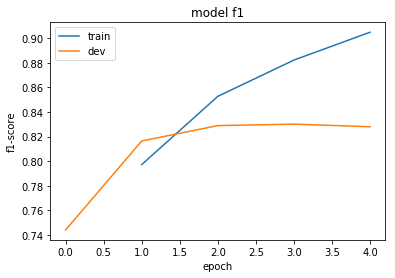

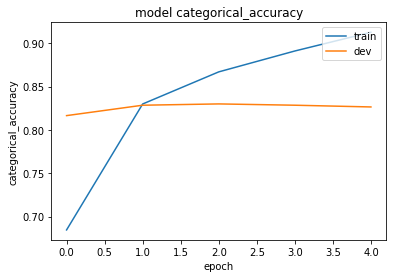

In [9]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt

%matplotlib inline
plot_history_metrics(history_obj=model_tf_history)

### Evaluate performance model

Evaluates the performance of the best trained model in the **test** dataset. 

In [10]:
score_tf = model_tf.evaluate(model_data_tf['x_test'],
                             model_data_tf['y_test'],
                             batch_size=best_model_params['batch_size'],
                             verbose=1)

print('\nTest f1: %.4f' % (score_tf[1]))
print('\nTest categorical accuracy: %.4f'% (score_tf[2]))

8000/8000 [==============================] - 0s 36us/step

Test f1: 0.8197

Test categorical accuracy: 0.8166


### Visualize Prediction Perfomance of **non-standardized** TF-IDF  model

--------------------------------------------------------------------------------
Accuracy Score: 81.66%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0      0.722     0.642     0.680       400
           1      0.926     0.910     0.918       400
           2      0.977     0.960     0.968       400
           3      0.821     0.792     0.807       400
           4      0.842     0.895     0.868       400
           5      0.588     0.728     0.650       400
           6      0.847     0.772     0.808       400
           7      0.859     0.865     0.862       400
           8      0.698     0.767     0.731       400
           9      0.678     0.652     0.665       400
          10      0.693     0.688     0.690       400
          11      0.878     0.865     0.872       400
       

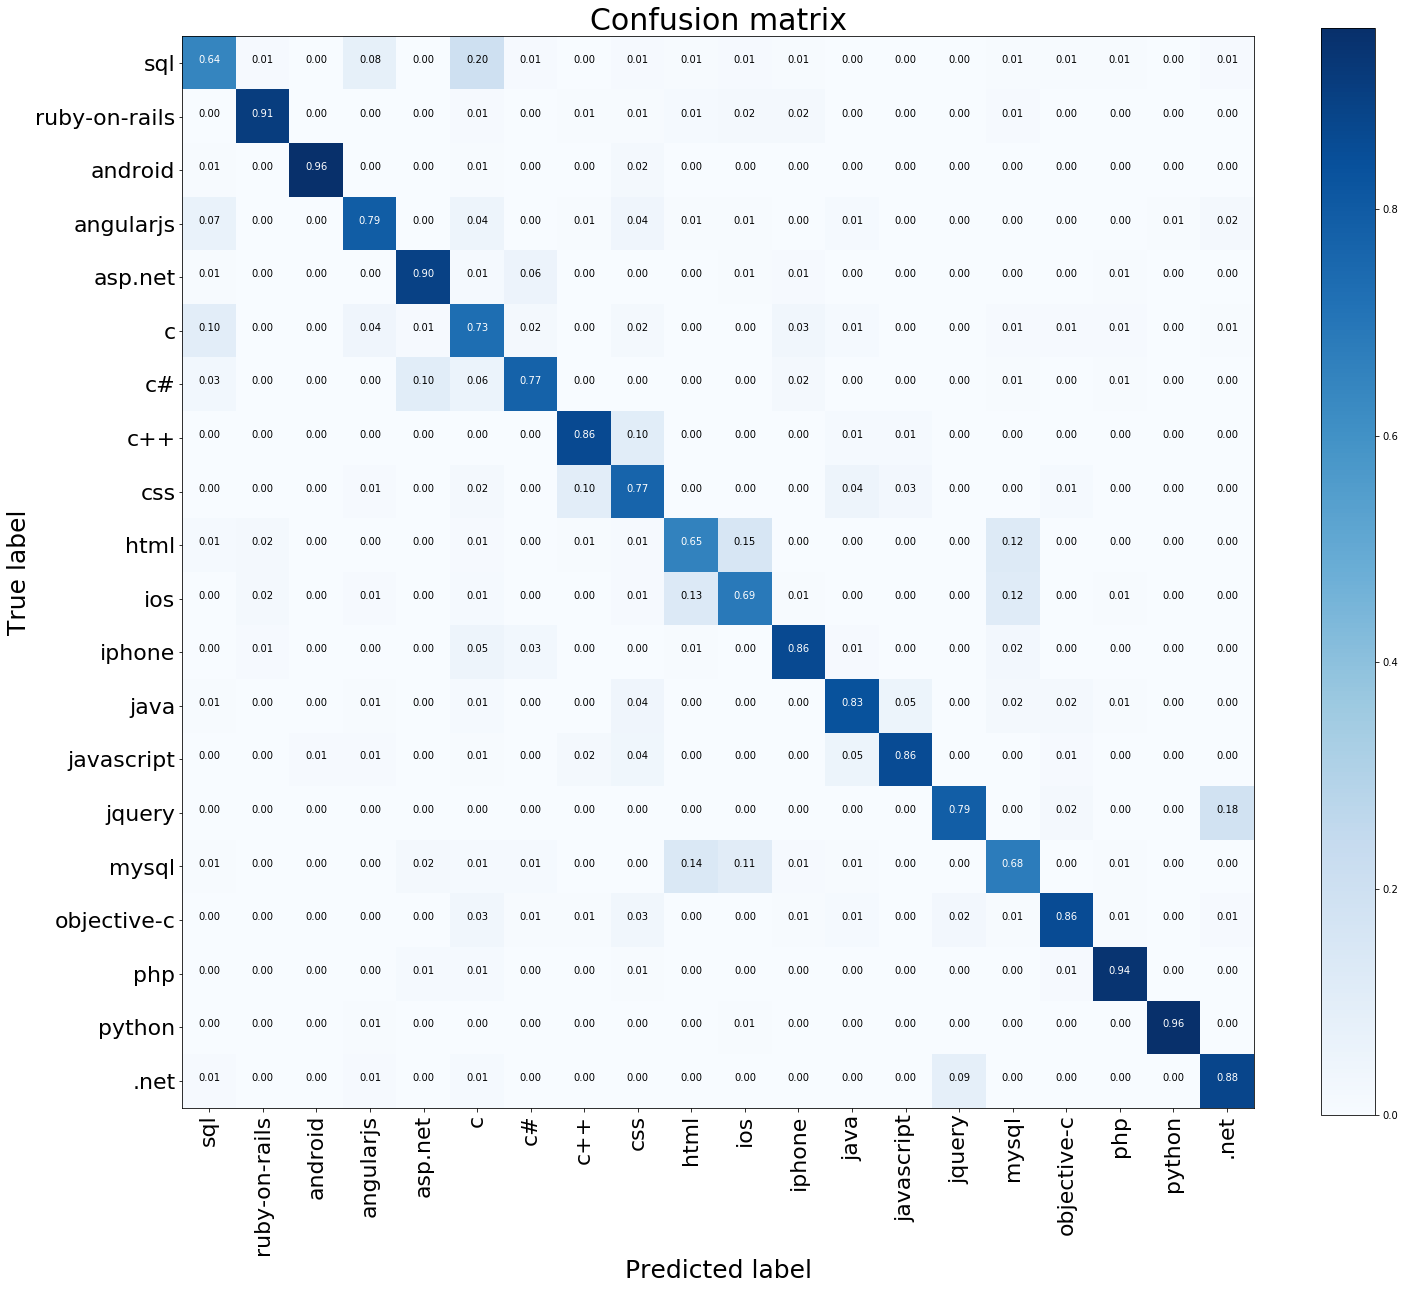

In [11]:
import numpy as np
from app.visualization import (plot_prediction_metrics,
                               create_clf_report,
                               plot_roc_curve,
                               plot_precision_recall_curve,
                               plot_confusion_matrix)
import matplotlib.pylab as plt

prediction_val_tf = model_tf.predict(model_data_tf['x_test'], batch_size=best_model_params['batch_size'])

# returns each entry result to the classification with the relevant probabilities
y_pred_processed_tf = np.array([np.argmax(val) for val in prediction_val_tf])
y_true_processed_tf = np.array([np.argmax(val) for val in model_data_tf['y_test']])

# If you want to see the OneVSAll ROC Curves of each class uncomment the below line
# plot_roc_curve(model_data_tf['y_test'], prediction_val_tf, Classes, 1)

# If you want to see the OneVSAll Precission Recall Curves of each class, comment out the below line
# plot_precision_recall_curve(model_data_tf['y_test'], prediction_val_tf, Classes , 1)

# If you want to get the Classification Report, comment out the below line
create_clf_report(y_true_processed_tf, y_pred_processed_tf, Classes)

# If you want to get the confusion matrix,comment out the below line
plot_confusion_matrix(y_true_processed_tf, y_pred_processed_tf, Classes)

## MLP classifier in Keras using standardized tf*idf features

In [12]:
# 70% Train & 30% Test
# 70% Train-Dev % 30* Train-Dev 
model_data_sdr_tf = preprocess_data(data, 'tags', 'post',
                                    input_ins='as_tf_idf',
                                    cv_split_full=0.2,
                                    cv_split_dev=0.125,
                                    standarize=True
                                    )

In [14]:
TALOS_SDR_TF_LOG_FILENAME = 'talos_sdr_tf_log'
talos_sdr_tf_log_pathname = os.path.join(TALOS_DIR, TALOS_SDR_TF_LOG_FILENAME)

tf_idf_sdr_model_config = tf_idf_model_config.copy()
tf_idf_sdr_model_config.update({
    'model_type': ['keras_sdr_tf_idf_model']
})

##### Production configuration
history_model_sdr_tf_idf = ta.Scan(model_data_sdr_tf['x_train'],
                                   model_data_sdr_tf['y_train'],
                                   x_val=model_data_sdr_tf['x_train_dev'],
                                   y_val=model_data_sdr_tf['y_train_dev'],
                                   model=load_model,
                                   params=tf_idf_sdr_model_config,
                                   grid_downsample=0.1,
                                   print_params=True,
                                   last_epoch_value=True,
                                   seed=(123),
                                   dataset_name=talos_sdr_tf_log_pathname
                                   )




  0%|          | 0/14 [00:00<?, ?it/s]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 7, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}




  7%|▋         | 1/14 [00:18<04:03, 18.76s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 7, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}




 14%|█▍        | 2/14 [00:35<03:38, 18.23s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 7, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}




 21%|██▏       | 3/14 [01:03<03:51, 21.04s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}




 29%|██▊       | 4/14 [01:16<03:06, 18.68s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 7, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}




 36%|███▌      | 5/14 [01:35<02:48, 18.70s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 4, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}




 43%|████▎     | 6/14 [01:51<02:24, 18.11s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}




 50%|█████     | 7/14 [02:21<02:29, 21.41s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 4, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}




 57%|█████▋    | 8/14 [02:48<02:18, 23.09s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}




 64%|██████▍   | 9/14 [03:09<01:52, 22.47s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}




 71%|███████▏  | 10/14 [03:34<01:33, 23.34s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 4, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}




 79%|███████▊  | 11/14 [03:44<00:58, 19.39s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 4, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}




 86%|████████▌ | 12/14 [03:56<00:34, 17.04s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}




 93%|█████████▎| 13/14 [04:10<00:16, 16.13s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 3, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}




100%|██████████| 14/14 [04:32<00:00, 17.85s/it]

In [15]:
report_sdr_stf = ta.Reporting(history_model_sdr_tf_idf)
best_model_sdr_idx = report_sdr_stf.data['val_f1'].idxmax()
best_model_sdr_params = report_sdr_stf.data.loc[best_model_sdr_idx].to_dict()
best_model_sdr_params

{'round_epochs': 4,
 'val_loss': 0.524185026884079,
 'val_f1': 0.8351940522193909,
 'val_categorical_accuracy': 0.8355,
 'loss': 0.43293305362973894,
 'f1': 0.8592413285800389,
 'categorical_accuracy': 0.8708214285714285,
 'visualize_proccess': 'False',
 'first_neuron': 128,
 'activation': 'relu',
 'dropout': 0.6,
 'number_of_hidden_layers': 0,
 'shapes': 'funnel',
 'epochs': 4,
 'early_stopping': 'True',
 'early_stopping_config__monitor': 'val_f1',
 'early_stopping_config__min_delta': 0,
 'early_stopping_config__patience': 3,
 'early_stopping_config__mode': 'max',
 'batch_size': 32,
 'model_type': 'keras_sdr_tf_idf_model'}

In [16]:
model_sdr_tf_history, model_sdr_tf = load_model(model_data_sdr_tf['x_train'],
                                                model_data_sdr_tf['y_train'],
                                                model_data_sdr_tf['x_train_dev'],
                                                model_data_sdr_tf['y_train_dev'],
                                                best_model_sdr_params)

### Visualize Model History Scores

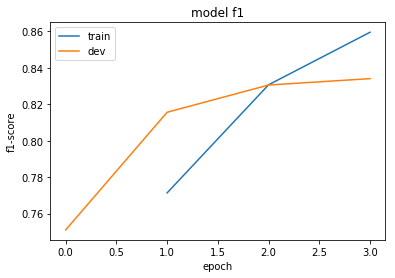

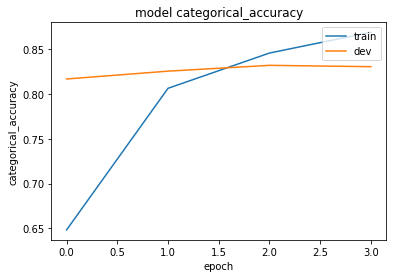

In [17]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt
%matplotlib inline

plot_history_metrics(history_obj=model_sdr_tf_history)

### Evaluate performance model

Evaluates the performance of the best trained model in the **test** dataset. 

In [18]:
score_sdr_tf = model_sdr_tf.evaluate(model_data_sdr_tf['x_test'],
                                     model_data_sdr_tf['y_test'],
                                     batch_size=best_model_sdr_params['batch_size'],
                                     verbose=1)

print('\nTest f1: %.4f' % (score_sdr_tf[1]))
print('\nTest categorical accuracy: %.4f'% (score_sdr_tf[2]))

8000/8000 [==============================] - 0s 48us/step

Test f1: 0.8212

Test categorical accuracy: 0.8227


### Visualize Prediction Perfomance of **standardized** TF-IDF  model

--------------------------------------------------------------------------------
Accuracy Score: 82.27%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0      0.736     0.655     0.693       400
           1      0.928     0.905     0.916       400
           2      0.980     0.960     0.970       400
           3      0.819     0.812     0.816       400
           4      0.841     0.897     0.868       400
           5      0.614     0.733     0.668       400
           6      0.832     0.780     0.805       400
           7      0.827     0.882     0.854       400
           8      0.676     0.740     0.706       400
           9      0.691     0.682     0.687       400
          10      0.708     0.698     0.703       400
          11      0.885     0.868     0.876       400
       

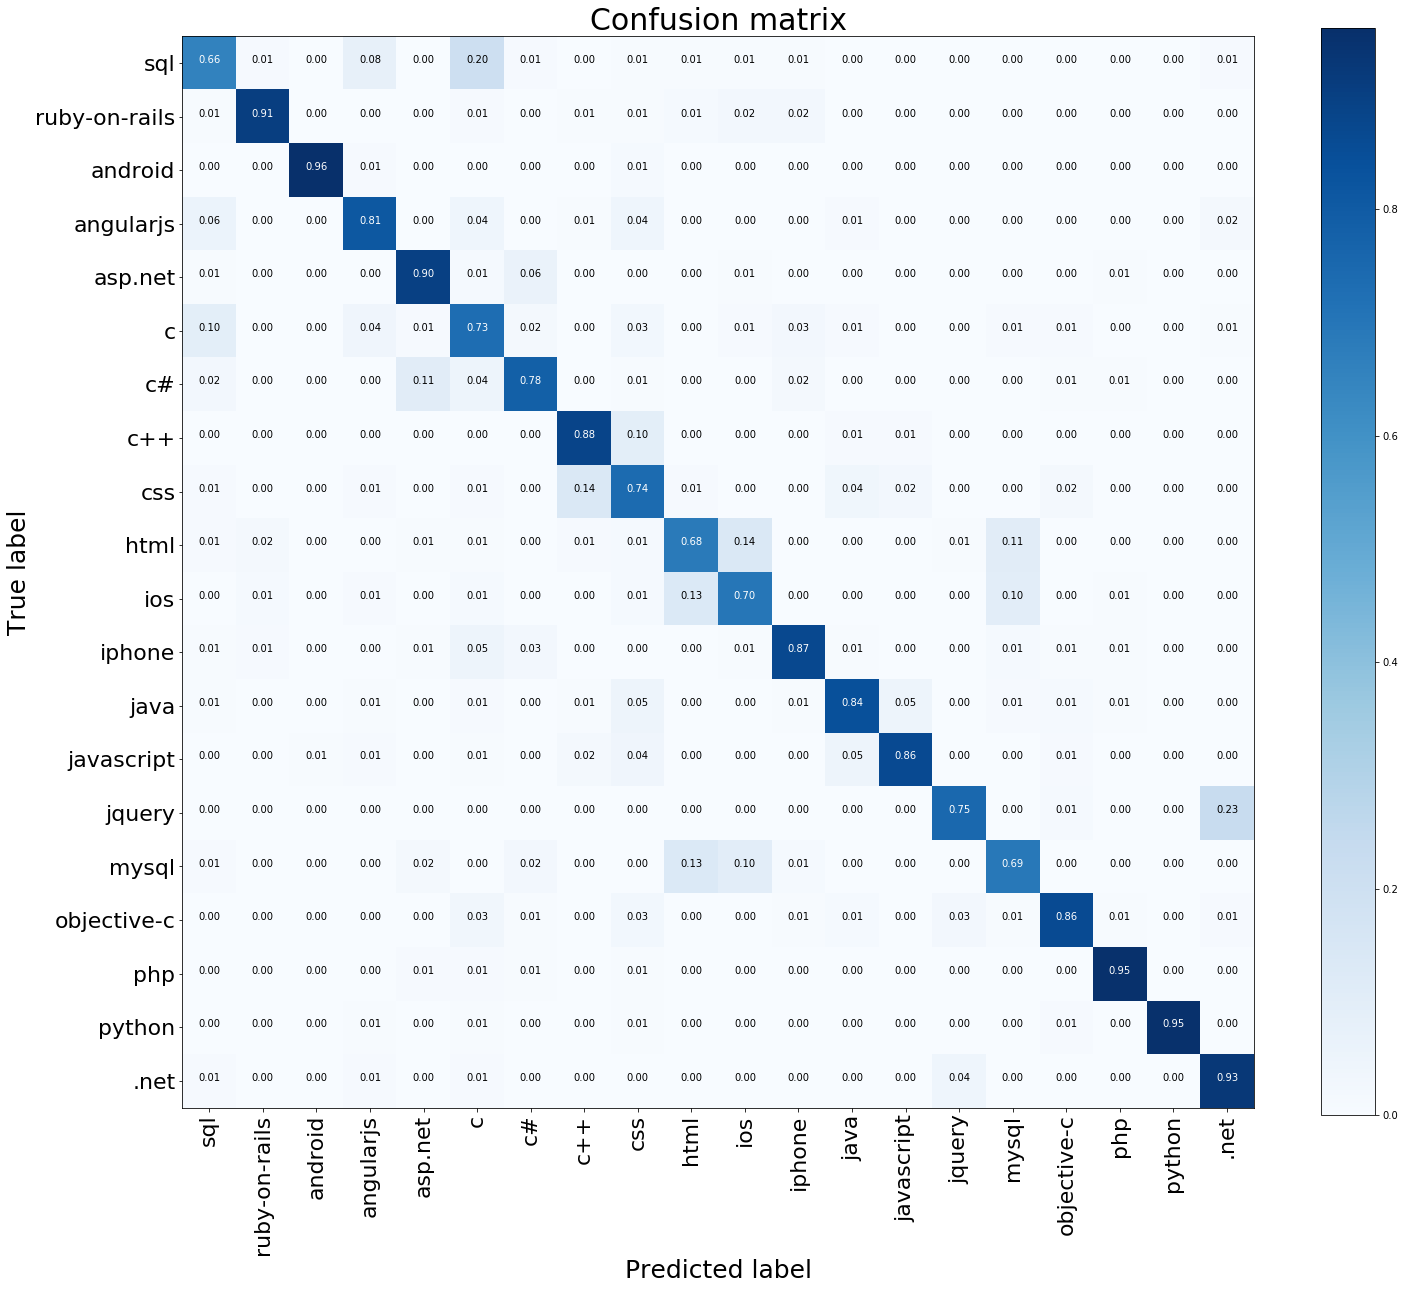

In [19]:
import numpy as np
from app.visualization import (plot_prediction_metrics,
                               create_clf_report,
                               plot_roc_curve,
                               plot_precision_recall_curve,
                               plot_confusion_matrix)
import matplotlib.pylab as plt

prediction_val_sdr_tf = model_sdr_tf.predict(model_data_sdr_tf['x_test'],
                                             batch_size=best_model_sdr_params['batch_size'])

# returns each entry result to the classification with the relevant probabilities
y_pred_processed_sdr_tf = np.array([np.argmax(val) for val in prediction_val_sdr_tf])
y_true_processed_sdr_tf = np.array([np.argmax(val) for val in model_data_sdr_tf['y_test']])

# If you want to get the Classification Report, comment out the below line
create_clf_report(y_true_processed_sdr_tf, y_pred_processed_sdr_tf , Classes)

# If you want to get the confusion matrix,comment out the below line
plot_confusion_matrix(y_true_processed_sdr_tf, y_pred_processed_sdr_tf , Classes)